In [ ]:
!pip install tensorflow-addons

import matplotlib.pyplot as plt
import os
from google.colab import files

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import zipfile
import os
import shutil
import tensorflow as tf
import random
import keras
from keras import layers
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
#import data
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste
License(s): other
 99% 309M/312M [00:03<00:00, 58.6MB/s]
100% 312M/312M [00:03<00:00, 82.7MB/s]


In [ ]:
# Path ke file ZIP
zip_path = '/content/sea-animals-image-dataste.zip'

# Nama folder baru untuk ekstraksi
extract_folder_name = 'dataset'

# Path lengkap ke folder ekstraksi
extract_folder_path = os.path.join('/content', extract_folder_name)

# Membuat folder ekstraksi jika belum ada
os.makedirs(extract_folder_path, exist_ok=True)

# Membuka file ZIP dan mengekstraknya ke folder baru
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"File diekstrak ke folder: {extract_folder_path}")


File diekstrak ke folder: /content/dataset


In [ ]:
# melihat setiap kelas
import os
print(os.listdir("/content/dataset"))

['Clams', 'Sharks', 'Turtle_Tortoise', 'Penguin', 'Sea Urchins', 'Corals', 'Nudibranchs', 'Starfish', 'Shrimp', 'Fish', 'Lobster', 'Sea Rays', 'Squid', 'Whale', 'Jelly Fish', 'Seal', 'Crabs', 'Seahorse', 'Puffers', 'Octopus', 'Otter', 'Eel', 'Dolphin']


In [ ]:
import os
import shutil
import random

#menentukan kelas
class_names= ['Fish', 'Octopus', 'Jelly Fish', 'Crabs']

# original path
original_dataset_dir ="/content/dataset"

# path baru
base_dir = "/content/dataset-2"
os.mkdir(base_dir)

# folder baru train
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# folder baru validation
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

classes = class_names

for cls in classes:
    cls_dir = os.path.join(original_dataset_dir, cls)
    files = os.listdir(cls_dir)
    random.shuffle(files)

    # split data
    split_point = int(0.8 * len(files))
    train_files = files[:split_point]
    validation_files = files[split_point:]

    train_cls_dir = os.path.join(train_dir, cls)
    os.makedirs(train_cls_dir)

    validation_cls_dir = os.path.join(validation_dir, cls)
    os.makedirs(validation_cls_dir)

   # memasukan data ke dalam folder
    for file in train_files:
        src = os.path.join(cls_dir, file)
        dst = os.path.join(train_cls_dir, file)
        shutil.copyfile(src, dst)

    for file in validation_files:
        src = os.path.join(cls_dir, file)
        dst = os.path.join(validation_cls_dir, file)
        shutil.copyfile(src, dst)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_dir="/content/dataset-2/train"
validation_dir="/content/dataset-2/validation"

image_size = (256,256)
batch_size = 32
seed = 999

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)



train_data = train_datagen.flow_from_directory(
    training_dir,
    class_mode="categorical",
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

valid_data = validation_datagen.flow_from_directory(
    validation_dir,
    class_mode='categorical',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

Found 1919 images belonging to 4 classes.
Found 481 images belonging to 4 classes.


# **Modeling**

In [ ]:
!pip install vit_keras
!pip install tensorflow-addons

from vit_keras import vit


vit_model = vit.vit_b16(
    image_size=(256, 256),  # Example: Adjusted to be a multiple of patch_size=16
    activation='softmax',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
    classes=4
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.4 MB/s eta 0:00:00
347502902/347502902 [==============================] - 1s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  warnings.warn(


In [ ]:
vit_model.summary()

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 16, 16, 768)       590592    
                                                                 
 reshape (Reshape)           (None, 256, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 257, 768)          768       
                                                                 
 Transformer/posembed_input  (None, 257, 768)          197376    
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 257, 768),        7087872   
  (TransformerBlock)          (None, 12, None, None)       

In [ ]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(32, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(4, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85844736  
                                                                 
 flatten_1 (Flatten)         (None, 768)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 768)               3072      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               98432     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 64)         

In [ ]:
model.eval()

AttributeError: 'Sequential' object has no attribute 'eval'

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
              metrics = ['accuracy'])

In [ ]:
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True, verbose = 1)

STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = valid_data.n // valid_data.batch_size



In [ ]:
history = model.fit(x = train_data,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = valid_data,
          validation_steps = STEP_SIZE_VALID,
          epochs = 30,
          callbacks = early_stopping_callbacks)

Epoch 1/30
59/59 [==============================] - 160s 2s/step - loss: 1.1800 - accuracy: 0.5575 - val_loss: 1.8659 - val_accuracy: 0.3521
Epoch 2/30
59/59 [==============================] - 112s 2s/step - loss: 1.0432 - accuracy: 0.6677 - val_loss: 1.1861 - val_accuracy: 0.5354
Epoch 3/30
59/59 [==============================] - 113s 2s/step - loss: 0.9748 - accuracy: 0.7334 - val_loss: 1.0940 - val_accuracy: 0.6938
Epoch 4/30
59/59 [==============================] - 111s 2s/step - loss: 0.9482 - accuracy: 0.7516 - val_loss: 1.4702 - val_accuracy: 0.4021
Epoch 5/30
59/59 [==============================] - 113s 2s/step - loss: 0.9427 - accuracy: 0.7472 - val_loss: 1.4324 - val_accuracy: 0.6042
Epoch 6/30
59/59 [==============================] - 113s 2s/step - loss: 0.9153 - accuracy: 0.7806 - val_loss: 1.1184 - val_accuracy: 0.6979
Epoch 7/30
59/59 [==============================] - 113s 2s/step - loss: 0.9096 - accuracy: 0.7748 - val_loss: 1.1639 - val_accuracy: 0.6562
Epoch 8/30
59

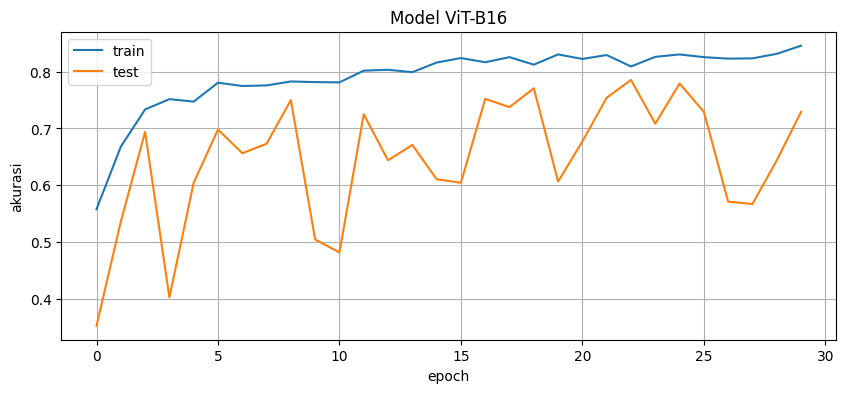

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model ViT-B16')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()